In [2]:
# import Python Libraries for the Individual Project
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random 

* Documentation: This is project

In [16]:
class MyClass(object):

    # MyClass object (self) contains several relevant fields as listed below:
    #
    # self.length - length of the desired coverage footprint
    # self.width - width of the desired coverage footprint 
    # self.map - desired coverage footprint 
    # self.tower - number of towers on the desired coverage footprint
    # self.trial - number of trials on the desired coverage footprint
    # self.totalArea - total area of the desired coverage footprint
    # self.currentArea - currentarea of the desired coverage footprint
    # self.colorList - a list of colors used for the desired coverage footprint
    
    def __init__(self, length, width):
        '''
        Given `self`, which is a MyClass object, `length`, which is the length of 
        the desired coverage footprint, and `width`, which is the width of the 
        desired coverage footprint, the init method initializes the desired 
        coverage footprint with the given dimension to the MyClass object. 
    
        :param length: length of the desired coverage footprint
        :type length: int
        :param width: width of the desired coverage footprint
        :type length: int
        :returns: none
        '''
        # relevant assert statements 
        assert isinstance(length, int), 'Invalid input: parameter length is not type int'
        assert isinstance(width, int), 'Invalid input: parameter width is not type int'
        assert length > 0, 'Invalid input: paramater length is not a positive integer'
        assert width > 0, 'Invalid input: paramater width is not a positive integer'
        # set relavant fields for MyClass object
        self.length = length
        self.width = width
        self.map = np.zeros((self.length , self.width)).astype(int)
        self.tower = self.trial = self.currentArea = 0
        self.totalArea = length * width
        colorList = []
        numColors = 100
        for i in range(numColors):
            colorList.append('%06X' % random.randint(0, 0xFFFFFF))
            colorList[i] = '#' + colorList[i]
        self.colorList = colorList 
    
    def add(self, startLength, startWidth, endLength, endWidth):
        '''
        Given `self`, which is a MyClass object, `startlength`, which is the 
        start position of length for the desired coverage footprint, 
        `startwidth`, which is the start position of width for the desired 
        coverage footprint, `endlength`, which is the end position of length 
        for the desired coverage footprint, and `endwidth`, which is the end 
        position of width for the desired coverage footprint, the add method
        adds the rectangle with given specifications to the desired coverage 
        footprint of the MyClass object
    
        :param startLength: start position of length of the desired coverage footprint
        :type length: int
        :param startWidth: start position of width of the desired coverage footprint
        :type length: int
        :param endLength: end position of length of the desired coverage footprint
        :type length: int
        :param endWidth: end position of width of the desired coverage footprint
        :type length: int
        :returns: 
                    -1 if rectangle is not added to the desired coverage footprint
                    0  if the desired coverage footprint is fully occupied
                    1  if rectangle is added to the desired coverage footprint
        '''
        # relevant assert statements 
        assert isinstance(startLength, int), 'Invalid input: parameter startLength is not type int'
        assert isinstance(startWidth, int), 'Invalid input: parameter startWidth is not type int'
        assert isinstance(endLength, int), 'Invalid input: parameter endLength is not type int'
        assert isinstance(endWidth, int), 'Invalid input: parameter endWidth is not type int'
        assert startLength in range(0, endLength), 'Invalid input: paramater startLength is not in range'
        assert startWidth in range(0, endWidth), 'Invalid input: paramater startWidth is not in range'
        assert endLength in range(startLength + 1, self.length + 1), 'Invalid input: paramater endLength is not in range'
        assert endWidth in range(startWidth + 1, self.width + 1), 'Invalid input: paramater endWidth is not in range'
        # check if the desired coverage footprint is fully occupied
        if self.currentArea == self.totalArea: return 0 
        flag = False
        # add rectangle to the desired coverage footprint
        for i in range(startLength, endLength):
            for j in range(startWidth, endWidth):
                if self.map[i][j] == 0:
                    self.map[i][j] = self.tower + 1
                    flag = True
                    self.currentArea += 1
        self.trial += 1
        # check if rectangle is not added to the desired coverage footprint
        if flag == False: return -1  
        flag = False
        maxcount = bestI = bestJ = bestK = bestL = -1
        # find optimal tuple of (startLength, startWidth, endLength, endWidth) that gives maximum area
        for i in range(startLength, endLength):
            for j in range(startWidth, endWidth):
                count = 0
                for k in range(i, endLength):
                    for l in range(j, endWidth):
                        if self.map[k][l] == self.tower + 1: count += 1
                        else: 
                            flag = True 
                            break    
                        if count > maxcount: 
                            maxcount = count
                            (bestI, bestJ, bestK, bestL) = (i, j, k, l)
                    if flag == True: break
        (xRange, yRange) =  (range(bestI, bestK + 1), range(bestJ, bestL + 1))
        # zero out areas outside of the rectangle to give the correct shape of the desired coverage footprint
        for i in range(startLength, endLength):
            for j in range(startWidth, endWidth):
                flag = i not in xRange or j not in yRange
                if self.map[i][j] == self.tower + 1 and flag == True: 
                    self.map[i][j] = 0
                    self.currentArea -= 1 
        self.tower += 1
        # return 1 since rectangle is added to the desired coverage footprint
        return 1
        
    def displayMap(self):
        '''
        Given `self`, which is a MyClass object, the displayMap method 
        displays the desired coverage footprint for the MyClass object. 
    
        :returns: none
        '''
        figureSize = 5
        # set the figure and axis for the plot
        plt.figure(figsize = (figureSize, figureSize))
        plt.xlim((0, self.length))   
        plt.ylim((0, self.width))
        plt.xticks(np.arange(0, self.length + 1, 1.0))
        plt.yticks(np.arange(0, self.width + 1, 1.0))
        ax = plt.subplot()
        # add colors to rectangles one by one and then display the plot
        for i in range(1, self.tower + 1):
            for j in range(0, self.length):
                for k in range(0, self.width):
                    if self.map[j][k] == i:
                        rect = patches.Rectangle((j,k), 1, 1, alpha = 1, color = self.colorList[i])
                        ax.add_patch(rect)
                        plt.text(j + 0.5, k + 0.5, i,
                        horizontalalignment = 'center',
                        verticalalignment = 'center',
                        fontsize = 10)
        plt.show()
  
    def getNumTowers(self):
        '''
        Given `self`, which is a MyClass object, the getNumTowers method 
        returns the number of towers on the desired coverage footprint for the MyClass object. 
    
        :returns: number of towers on the desired coverage footprint for the MyClass object
        '''
        return self.tower
        
    def getNumTrials(self):
        '''
        Given `self`, which is a MyClass object, the getNumTrials method 
        returns the number of trials on the desired coverage footprint for the MyClass object. 
    
        :returns: number of trials on the desired coverage footprint for the MyClass object
        '''
        return self.trial
        
    def getTotalArea(self):
        '''
        Given `self`, which is a MyClass object, the getTotalArea method 
        returns the total area of the desired coverage footprint for the MyClass object. 
    
        :returns: total area of the desired coverage footprint for the MyClass object
        '''
        return self.totalArea

    def getCurrentArea(self):
        '''
        Given `self`, which is a MyClass object, the getCurrentArea method 
        returns the current area of the desired coverage footprint for the MyClass object. 
    
        :returns: current area of the desired coverage footprint for the MyClass object
        '''
        return self.currentArea


In [4]:
# Test Case 1 for init: negative inputs
xLim = -5
yLim = -3
net = MyClass(xLim, yLim)

AssertionError: Invalid input: paramater length is not a positive integer

In [5]:
# Test Case 2 for init: non-integer inputs
xLim = 1
yLim = list()
net = MyClass(xLim, yLim)

AssertionError: Invalid input: parameter width is not type int

In [6]:
# Test Case 1 for add: non-integer inputs
xLim = 5
yLim = 5
net = MyClass(xLim, yLim)
startLength = range(1,1)
startWidth = (1,1)
endLength = 4.0
endWidth = list()
value = net.add(startLength, startWidth, endLength, endWidth)    

AssertionError: Invalid input: parameter startLength is not type int

In [7]:
# Test Case 1 for add: startLength >= endLength or startWidth >= endWidth
xLim = 5
yLim = 5
net = MyClass(xLim, yLim)
startLength = 4
startWidth = 3
endLength = 2
endWidth = 3
value = net.add(startLength, startWidth, endLength, endWidth) 
net.displayMap()


AssertionError: Invalid input: paramater startLength is not in range

In [8]:
# Test Case 2 for add: out of bounds 
xLim = 6
yLim = 6
net = MyClass(xLim, yLim)
startLength = -1
startWidth = 0
endLength = 5
endWidth = 5
value = net.add(startLength, startWidth, endLength, endWidth) 
net.displayMap()

AssertionError: Invalid input: paramater startLength is not in range

Resulting resolved coverage: 39 for 10 communication towers


/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


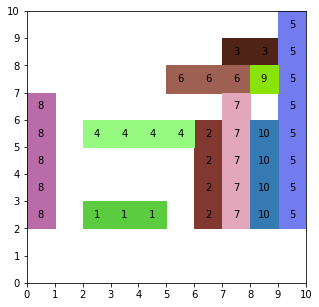

39
Total area of coverage relative to desired total coverage area: 39.0%
On average across 10 experiments, it takes 54.4 communication towers before full coverage is obtained


In [17]:
# (1) Given an overall desired coverage footprint and a sequence of 
#     n communications towers, what is the resulting resolved coverage?
n = 10
xLim = yLim = 10
obj = MyClass(xLim, yLim)
for j in range(0, n):
    startLength = random.randint(0, xLim - 2)  
    startWidth = random.randint(0, yLim - 2) 
    endLength = random.randint(startLength + 1, xLim)  
    endWidth = random.randint(startWidth + 1, yLim)
    value = obj.add(startLength, startWidth, endLength, endWidth)    
    if value == 0: break
print ('Resulting resolved coverage: ' + str(obj.currentArea) + ' for ' + str(n) + ' communication towers')
obj.displayMap()
print (obj.getCurrentArea())
# (2) What is the total area of coverage relative to the desired total 
#     coverage area of the original footprint? That is, are there any gaps in coverage?
print ('Total area of coverage relative to desired total coverage area: ' + str(obj.currentArea * 100.0 / obj.totalArea) + '%')
# (3) On average, how many communications towers are required before full coverage is obtained?
xLim = yLim = 13
obj = MyClass(xLim, yLim)
numExperiment = 10
maxTrial = 100
aList = list([0] * (numExperiment))
currentSum = 0
# after this loop found numExperiment full maps
for i in range(0, numExperiment):
# after this loop we found one full map
    for j in range(0, maxTrial):
        startLength = random.randint(0, xLim - 2)  
        startWidth = random.randint(0, yLim - 2) 
        endLength = random.randint(startLength + 1, xLim)  
        endWidth = random.randint(startWidth + 1, yLim)
        value = obj.add(startLength, startWidth, endLength, endWidth)    
        if value == 0:
            currentSum += obj.tower
            break
            
print ('On average across ' + str(numExperiment) + ' experiments, it takes ' + str(currentSum * 1.0/numExperiment) + ' communication towers before full coverage is obtained')         
    